<a href="https://colab.research.google.com/github/vandien201462C/Week7/blob/main/USA_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd

In [2]:

url = '/content/drive/MyDrive/AI/file_csv/USA_Housing.csv'
data = pd.read_csv(url)

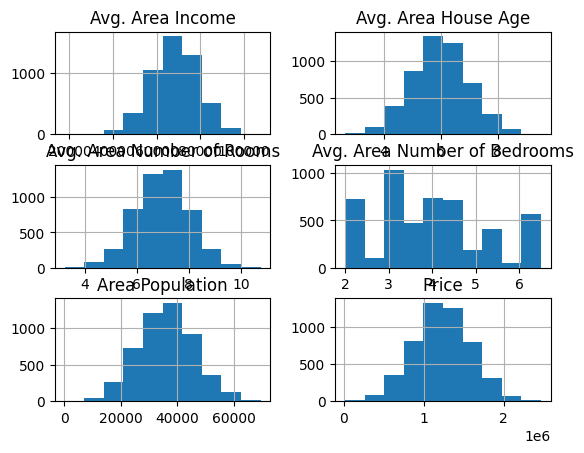

In [3]:
import matplotlib.pyplot as plt
data.hist() #So lan lap lai cua data
plt.show()

In [4]:
#Moi lien quan giua cac dai luong
correlation = data.corr()
print(correlation)
     

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

<Axes: >

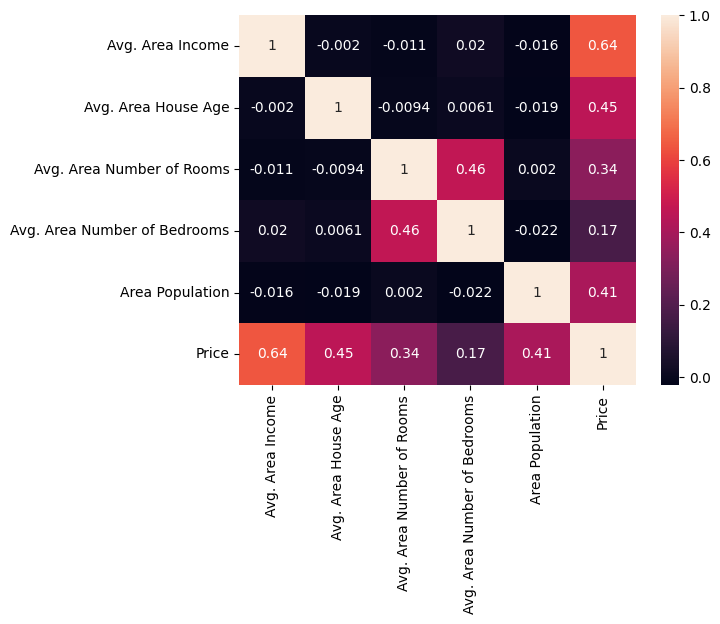

In [5]:
import seaborn as sns
sns.heatmap(correlation, annot = True)
#Gia tri tuyet doi cang lon, moi lien quan cang lon
#Dau tru la nghich bien, dau cong la dong bien

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Avg. Area Income', ylabel='Price'>

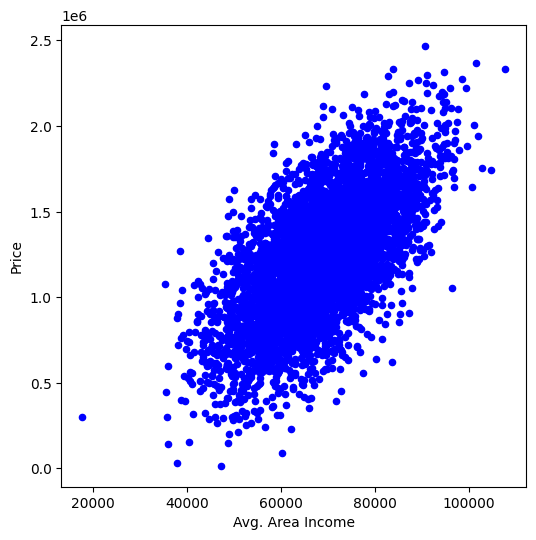

In [6]:
#Ta thấy rằng giá của một căn nhà ở usa phụ thuộc nhiều nhất vào mức thu nhập trung bình
#của khu vực đó
     

data.plot(kind= 'scatter', x = 'Avg. Area Income', y = 'Price', figsize = (6 , 6), color = 'blue')
     

In [7]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X = pd.DataFrame(data['Avg. Area Income']), y= data['Price'])
print(model.intercept_)
print(model.coef_)
#y = coef*x + intercept
     

-221579.4782059181
[21.19548317]


In [8]:

#Do chinh xac
model.score(X = pd.DataFrame(data['Avg. Area Income']), y= data['Price'])

0.4092593070338846

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


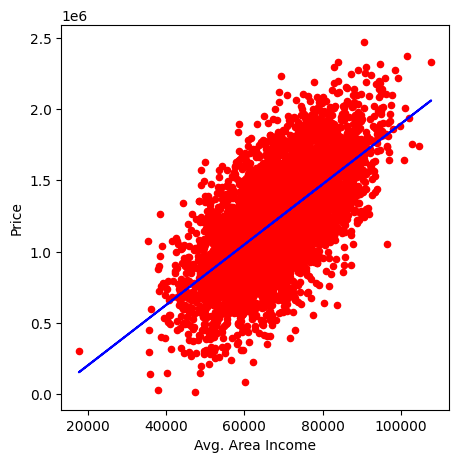

In [9]:
data.plot(kind= 'scatter', x = 'Avg. Area Income', y= 'Price', figsize = (5,5), color = 'red')
y_pred = model.predict(X = pd.DataFrame(data['Avg. Area Income']))
plt.plot(data['Avg. Area Income'], y_pred, color = 'blue')

Intercept cua mo hinh: 5786.062805456808
Coefficient cua mo hinh [1.43822894e+01 4.98015093e-05]
Do chinh xac cua mo hinh 0.40978359512172113


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac cua model 0.40978359512172113


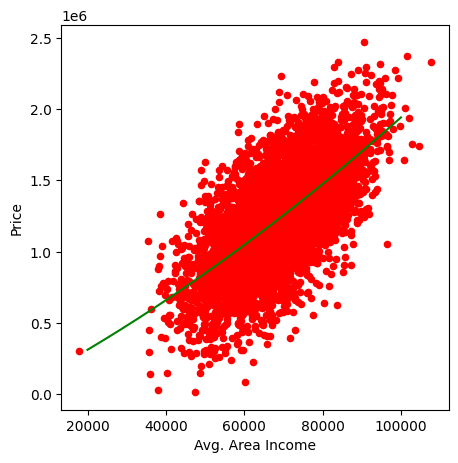

In [10]:
#Mo hinh bac 2
model = linear_model.LinearRegression()
X = pd.DataFrame([data['Avg. Area Income'], data['Avg. Area Income']**2]).T
model.fit(X, y= data['Price'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh', model.coef_)
print('Do chinh xac cua mo hinh', model.score(X, y = data['Price']))

#Ve do thi mo hinh bac 2
import numpy as np
range = np.arange(20000,100000,10)
data.plot(kind= 'scatter', x = 'Avg. Area Income', y= 'Price', figsize = (5,5), color = 'red')
predictor = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'green')
print('Do chinh xac cua model', model.score(X, y = data['Price']))

Intercept cua mo hinh: -90874.44992992934
Coefficient cua mo hinh [ 1.88774722e+01 -1.79963602e-05  3.32345038e-10]
Do chinh xac cua mo hinh 0.409792512563658


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac cua model 0.409792512563658


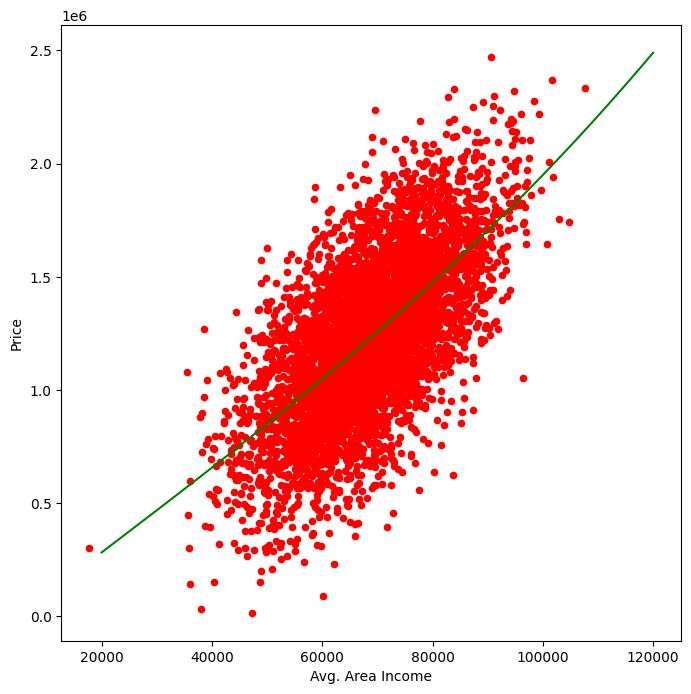

In [11]:
#Mo hinh bac 3
model = linear_model.LinearRegression()
X = pd.DataFrame([data['Avg. Area Income'], data['Avg. Area Income']**2, data['Avg. Area Income']**3]).T
model.fit(X, y= data['Price'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh', model.coef_)
print('Do chinh xac cua mo hinh', model.score(X, y = data['Price']))

#Ve do thi mo hinh bac 3
import numpy as np
range = np.arange(20000,120000,10)
data.plot(kind= 'scatter', x = 'Avg. Area Income', y= 'Price', figsize = (8,8), color = 'red')
predictor = pd.DataFrame([range, range**2, range**3]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'green')
print('Do chinh xac cua model', model.score(X, y = data['Price']))


Intercept cua mo hinh: 182027.255027388
Coefficient cua mo hinh [ 1.04315844e-08  4.50868104e-04 -4.65376551e-09  1.92421491e-14]
Do chinh xac cua mo hinh 0.40983861286665924


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac cua model 0.40983861286665924


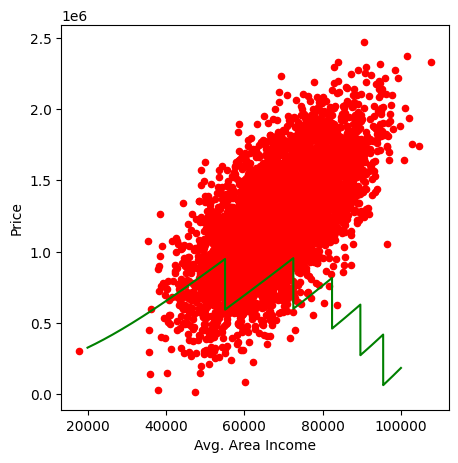

In [12]:
#Mo hinh bac 4
model = linear_model.LinearRegression()
X = pd.DataFrame([data['Avg. Area Income'], data['Avg. Area Income']**2, data['Avg. Area Income']**3, data['Avg. Area Income']**4]).T
model.fit(X, y= data['Price'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh', model.coef_)
print('Do chinh xac cua mo hinh', model.score(X, y = data['Price']))
#Ve do thi mo hinh bac 4
import numpy as np
range = np.arange(20000,100000,10)
data.plot(kind= 'scatter', x = 'Avg. Area Income', y= 'Price', figsize = (5,5), color = 'red')
predictor = pd.DataFrame([range, range**2, range**3, range**4]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'green')
print('Do chinh xac cua model', model.score(X, y = data['Price']))
     

In [ ]:
#Vậy ta thấy rằng mô hình bậc 3 là mô hình đem lại độ chính xác cao nhất 
#Biểu thị mối liên hệ giữa giá nhà và mức thu nhập trung bình của khu vực